In [187]:
import pandas as pd
import numpy as np

In [188]:
df_data = pd.read_csv('../input/musk-csv/musk_csv.csv')

In [189]:
print(df_data.head())

   ID molecule_name conformation_name  f1   f2   f3  f4   f5  f6  f7  ...  \
0   1      MUSK-211           211_1+1  46 -108  -60 -69 -117  49  38  ...   
1   2      MUSK-211          211_1+10  41 -188 -145  22 -117  -6  57  ...   
2   3      MUSK-211          211_1+11  46 -194 -145  28 -117  73  57  ...   
3   4      MUSK-211          211_1+12  41 -188 -145  22 -117  -7  57  ...   
4   5      MUSK-211          211_1+13  41 -188 -145  22 -117  -7  57  ...   

   f158  f159  f160  f161  f162  f163  f164  f165  f166  class  
0  -308    52    -7    39   126   156   -50  -112    96      1  
1   -59    -2    52   103   136   169   -61  -136    79      1  
2  -134  -154    57   143   142   165   -67  -145    39      1  
3   -60    -4    52   104   136   168   -60  -135    80      1  
4   -60    -4    52   104   137   168   -60  -135    80      1  

[5 rows x 170 columns]


In [190]:
cnt0 = 0
cnt1 = 0
df_class = df_data['class']
for i in range(len(df_class)):
    if df_class[i] == 0:
        cnt0 = cnt0 + 1
    if df_class[i] == 1:
        cnt1 = cnt1 + 1

In [191]:
print(cnt0,cnt1)

5581 1017


# the data seems to be little imbalanced classes belonging to 0 is more than 5 times of class 1

In [192]:
df_class_0 = df_data[df_data['class'] == 0]
df_class_1 = df_data[df_data['class'] == 1]

# randomly selecting data from class 0 so that number of data of class 0 is equal to class 1

In [193]:
df_class_0_sample = df_class_0.sample(n=cnt1)

In [194]:
df_train = pd.DataFrame()

In [195]:
df_train = df_train.append(df_class_0_sample)
df_train = df_train.append(df_class_1)

In [196]:
print(len(df_train))

2034


In [197]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 1072 to 1016
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 2.7+ MB
None


In [198]:
print(df_train.describe())

                ID           f1           f2           f3           f4  \
count  2034.000000  2034.000000  2034.000000  2034.000000  2034.000000   
mean   2148.626844    52.454277  -124.483776   -76.961160    -9.407571   
std    2009.847883    44.401426    85.765991    63.932222    74.078285   
min       1.000000   -30.000000  -199.000000  -167.000000  -114.000000   
25%     509.250000    37.000000  -194.000000  -140.000000   -73.000000   
50%    1017.500000    44.000000  -152.500000   -87.500000   -37.000000   
75%    3754.000000    51.000000  -100.000000   -22.000000    31.750000   
max    6598.000000   292.000000    95.000000    72.000000   161.000000   

                f5           f6           f7           f8           f9  ...  \
count  2034.000000  2034.000000  2034.000000  2034.000000  2034.000000  ...   
mean   -107.078171    12.544739    -3.201082   -18.405113   -73.138643  ...   
std      55.311934    75.529801   105.461637    91.071406   101.271753  ...   
min    -118.00000

In [199]:
print(df_train.isnull().values.any())

False


In [200]:
corr_value = df_train.corr()

In [201]:
print(corr_value)

             ID        f1        f2        f3        f4        f5        f6  \
ID     1.000000 -0.035422  0.174811  0.230490  0.240064 -0.041917  0.170779   
f1    -0.035422  1.000000 -0.077855 -0.107972 -0.238055 -0.004939  0.111059   
f2     0.174811 -0.077855  1.000000  0.570024 -0.218357 -0.121184  0.143115   
f3     0.230490 -0.107972  0.570024  1.000000 -0.360358 -0.074762  0.211184   
f4     0.240064 -0.238055 -0.218357 -0.360358  1.000000 -0.022743 -0.266433   
...         ...       ...       ...       ...       ...       ...       ...   
f163   0.408713 -0.003899  0.057835 -0.018339  0.297317  0.063646 -0.006712   
f164   0.085080  0.113925  0.012280 -0.023397 -0.118346 -0.020283  0.022932   
f165  -0.207103  0.406267 -0.120174 -0.086282 -0.368783 -0.086164  0.040086   
f166  -0.108246 -0.084144  0.035399 -0.012415  0.049729 -0.082546 -0.075270   
class -0.815997 -0.193443 -0.185373 -0.163861 -0.132310 -0.058741 -0.146116   

             f7        f8        f9  ...      f158 

# some featues has close correlation > 0.9


In [202]:
column_names = corr_value.columns

In [203]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_train, random_state=5, test_size = 0.2)

In [204]:
train_x = train.iloc[:,3:-1]
train_y = train.iloc[:,-1]
test_x = test.iloc[:,3:-1]
test_y = test.iloc[:,-1]
test_y1 = test_y

In [205]:

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
train_x = train_x.values
test_x = test_x.values
train_x = train_x.reshape(1627,166,1)
test_x = test_x.reshape(407,166,1)
print(train_x.shape)
print(test_x.shape)


(1627, 166)
(1627,)
(407, 166)
(407,)
(1627, 166, 1)
(407, 166, 1)


In [206]:
from keras.utils import to_categorical
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [207]:
#import tensorflow
from keras.layers import LSTM,Dense
from keras.models import Sequential
from tensorflow.python.framework import ops
ops.reset_default_graph()



In [208]:
model = Sequential()
model.add(LSTM(64,input_shape=(166,1),return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(64,input_shape=(166,1)))
model.add(Dropout(0.3))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 166, 64)           16896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 166, 64)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 130       
_________________________________________________________________
activation_7 (Activation)    (None, 2)                 0         
Total params: 50,050
Trainable params: 50,050
Non-trainable params: 0
__________________________________________________

In [209]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger
#checkpoint = ModelCheckpoint('checkpoint.h5', monitor='val_loss', verbose=1, save_best_only=False,save_weights_only=False, mode='auto')
#early = EarlyStopping(monitor="loss", mode="min", patience=5)
#csv_logger = CSVLogger('iv3-log.csv', append=True)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
hist = model.fit(train_x,train_y,batch_size=32,epochs=30,validation_data=(test_x,test_y))

Train on 1627 samples, validate on 407 samples
Epoch 1/30
1627/1627 [==============================] - 17s 11ms/step - loss: 0.6398 - acc: 0.6294 - val_loss: 0.5406 - val_acc: 0.7052
Epoch 2/30
1627/1627 [==============================] - 16s 10ms/step - loss: 0.4911 - acc: 0.7652 - val_loss: 0.4421 - val_acc: 0.8305
Epoch 3/30
1627/1627 [==============================] - 16s 10ms/step - loss: 0.4008 - acc: 0.8297 - val_loss: 0.3966 - val_acc: 0.8501
Epoch 4/30
1627/1627 [==============================] - 15s 9ms/step - loss: 0.3867 - acc: 0.8371 - val_loss: 0.3695 - val_acc: 0.8600
Epoch 5/30
1627/1627 [==============================] - 17s 10ms/step - loss: 0.3398 - acc: 0.8623 - val_loss: 0.3616 - val_acc: 0.8796
Epoch 6/30
1627/1627 [==============================] - 16s 10ms/step - loss: 0.3151 - acc: 0.8728 - val_loss: 0.3785 - val_acc: 0.8600
Epoch 7/30
1627/1627 [==============================] - 15s 9ms/step - loss: 0.3227 - acc: 0.8697 - val_loss: 0.3772 - val_acc: 0.8452
Epo

In [210]:
s = model.save_weights('weight3.h5')

In [211]:
print(hist.history.keys())


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [212]:
import matplotlib.pyplot as plt

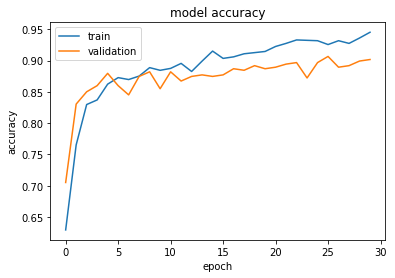

In [213]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

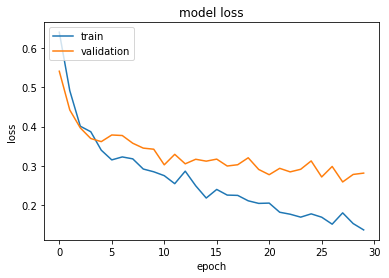

In [214]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [223]:
pred = model.predict_classes(test_x,verbose=0)
#pred = pred[:,0]
print(type(pred))
print(test_y.shape)
print(pred.shape)


<class 'numpy.ndarray'>
(407, 2)
(407,)


In [216]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [217]:
accuracy = accuracy_score(test_y1, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y1, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y1, pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y1, pred)
print('F1 score: %f' % f1)

Accuracy: 0.901720
Precision: 0.880734
Recall: 0.932039
F1 score: 0.905660


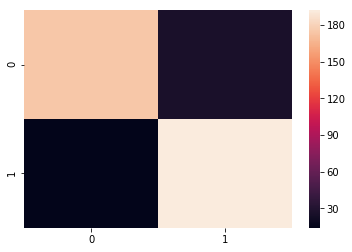

In [243]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
results = confusion_matrix(test_y1, pred)
sns.heatmap(results,annot=True)

In [219]:
print(results)

[[175  26]
 [ 14 192]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.963


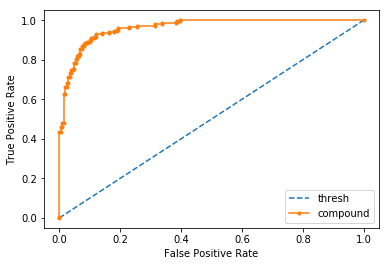

In [242]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
ns_probs = [0 for _ in range(len(test_y))]
ns_auc = roc_auc_score(test_y1, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(test_y1, ns_probs)
lr_probs = model.predict_proba(test_x,verbose=0)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(test_y1, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y1, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='thresh')
plt.plot(lr_fpr, lr_tpr, marker='.', label='compound')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()